<a href="https://colab.research.google.com/github/Annu1782003/task4/blob/main/Network_Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sampadab17/network-intrusion-detection

  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 78.1MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/network-intrusion-detection.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data=pd.read_csv('/content/Train_data.csv')
test_data=pd.read_csv('/content/Test_data.csv')
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_data.shape

(25192, 42)

In [ ]:
total = train_data.shape[0]
missing_columns = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
print(f"Number of columns with missing values: {missing_columns}")

Number of columns with missing values: []


In [ ]:
duplicates=train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder

def LabelEncode(df):
    for col in df.columns:
        if df[col].dtype=='object':
            label_encoder=LabelEncoder()
            df[col]=label_encoder.fit_transform(df[col])

LabelEncode(train_data)
LabelEncode(test_data)
for col in train_data:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    # calculate IQR for each column
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = train_data[(train_data[col] > upper) & (train_data[col] < lower)]

print(f"Outliers information: \n{outliers.sum()}")

Outliers information: 
duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0

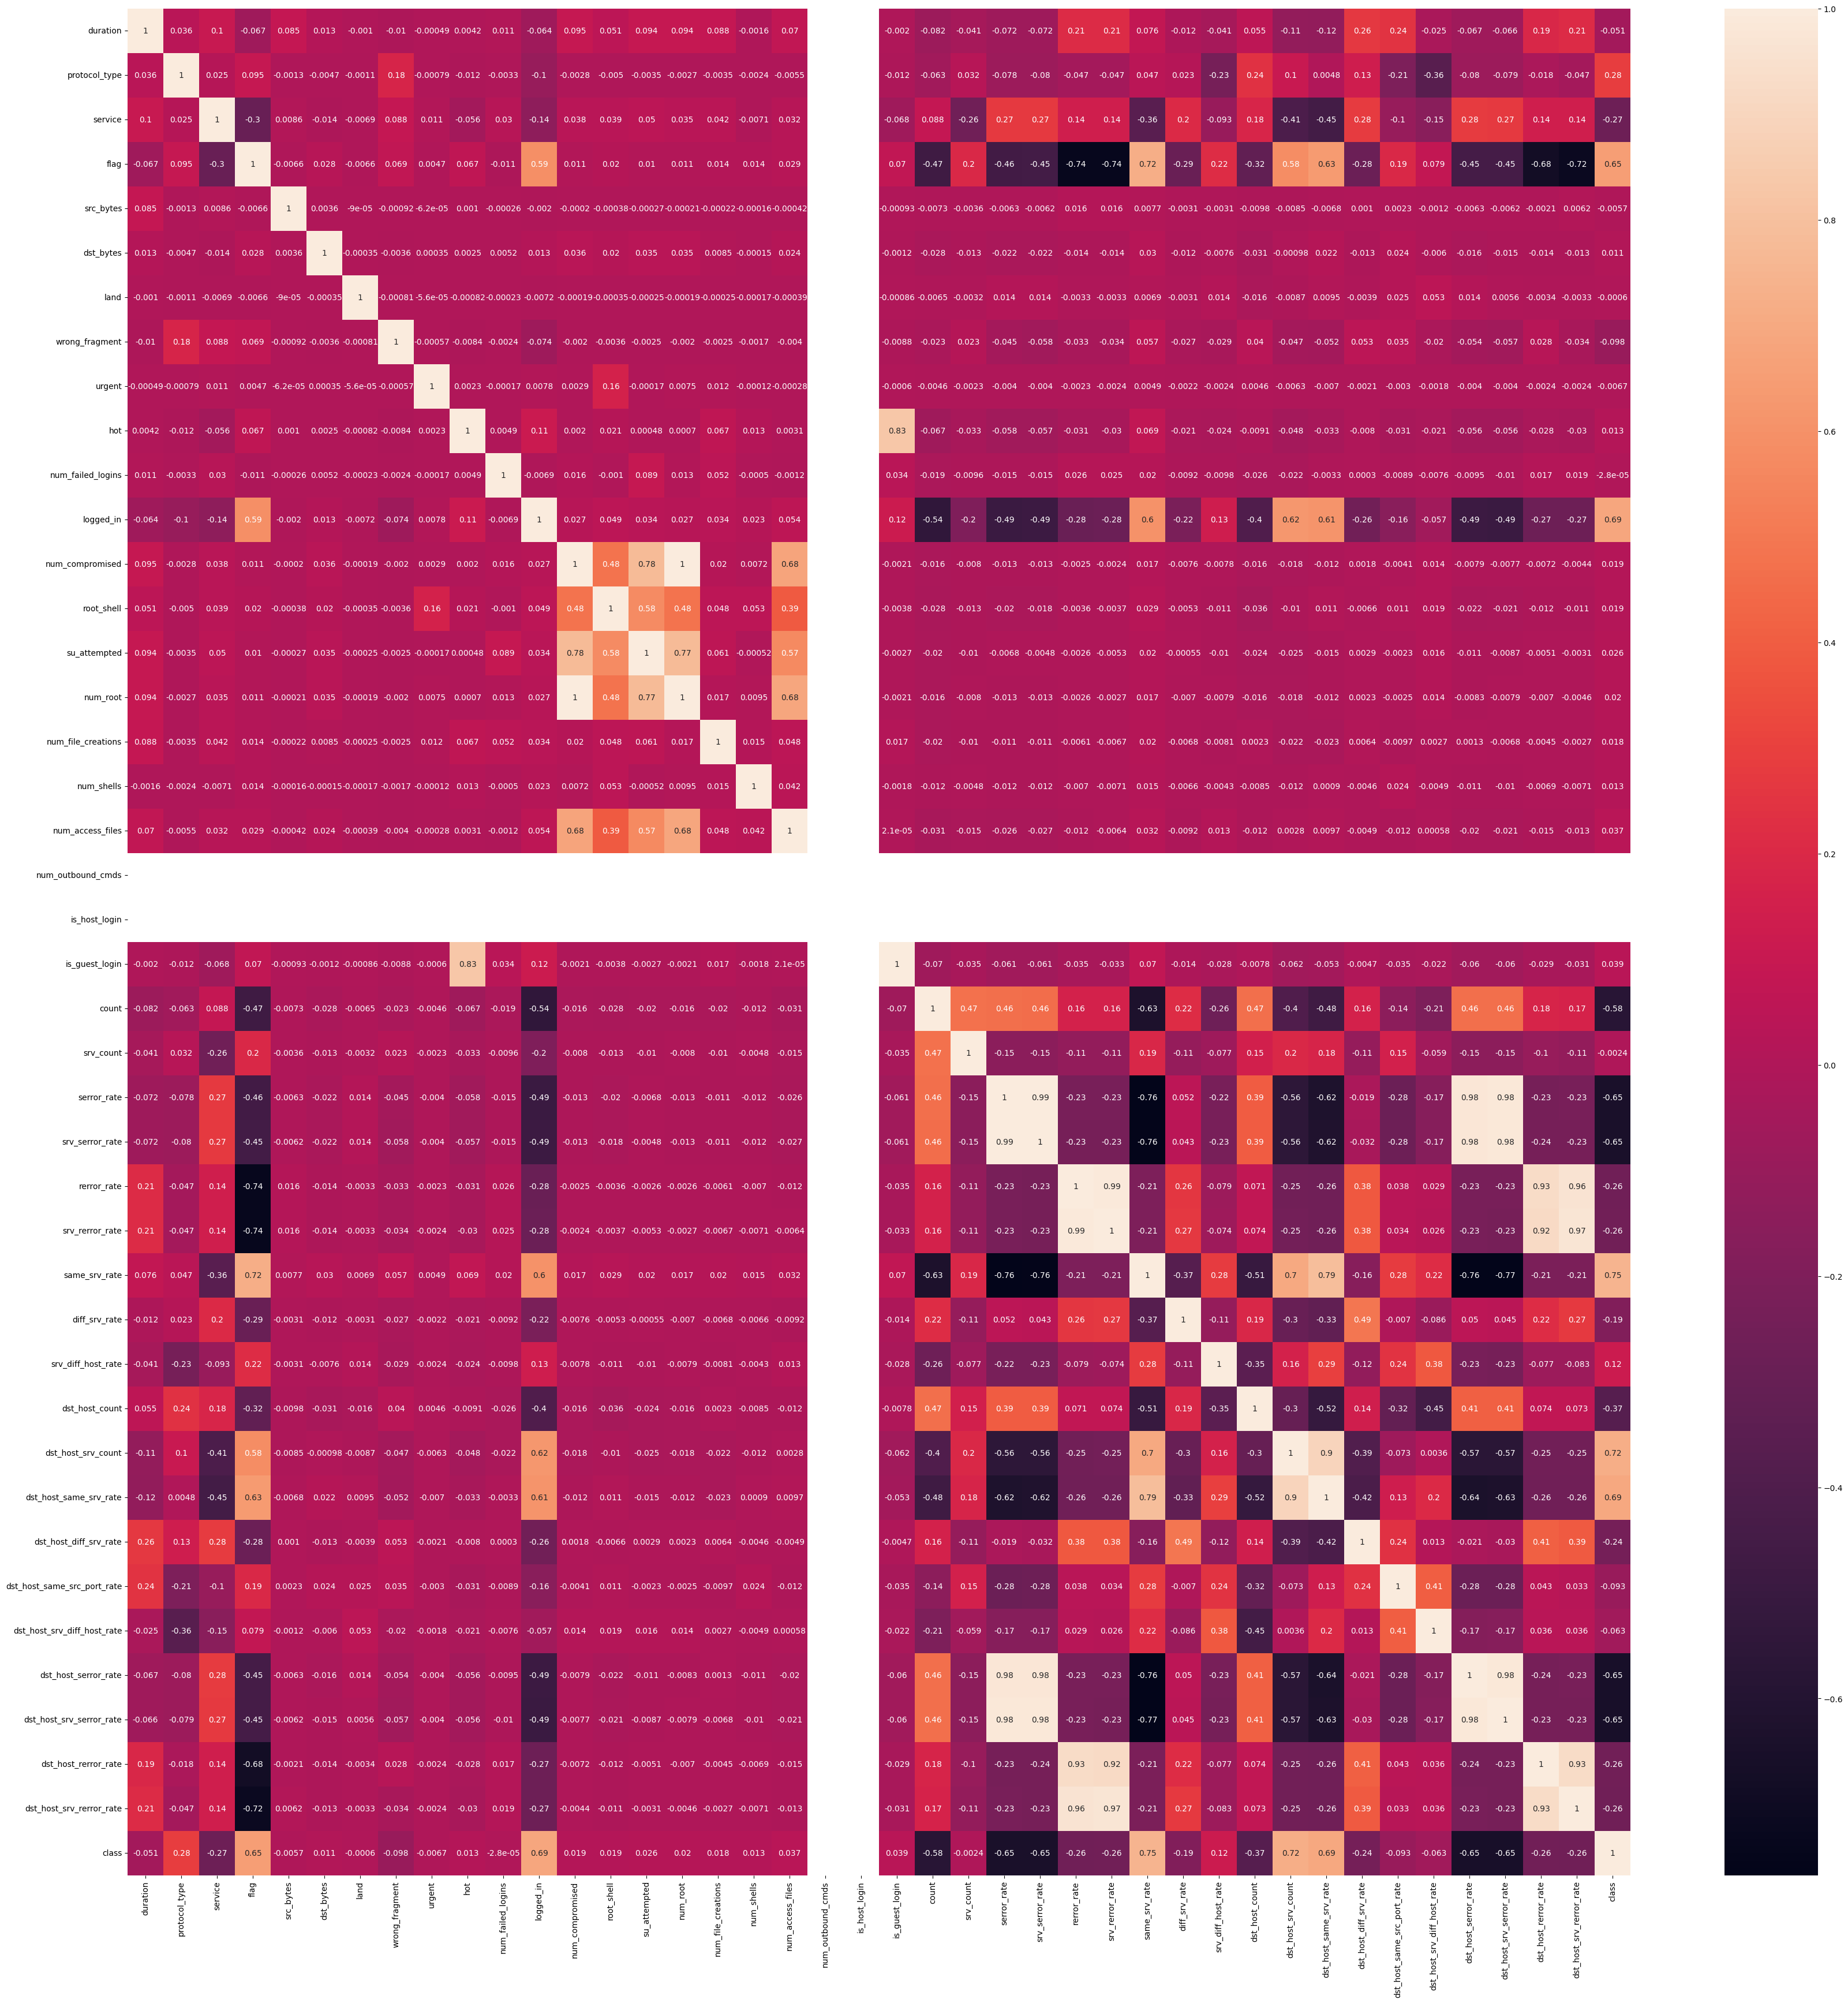

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(42,42))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [ ]:
print(train_data.shape)
train_data=train_data.drop('num_outbound_cmds', axis=1)
test_data=test_data.drop('num_outbound_cmds', axis=1)
print(train_data.shape)

(25192, 42)
(25192, 41)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train=train_data.drop('class', axis=1)
Y_train=train_data['class']
rfc=RandomForestClassifier()
rfe=RFE(rfc, n_features_to_select=10)
rfe=rfe.fit(X_train, Y_train)

feature_map=[(i,v) for i,v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features=[v for i,v in feature_map if i==True]
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [ ]:
X_train=X_train[selected_features]
X_train.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate
0,1,19,9,491,0,2,1.00,0.00,25,0.17
1,2,41,9,146,0,13,0.08,0.15,1,0.00
2,1,46,5,0,0,123,0.05,0.07,26,0.10
3,1,22,9,232,8153,5,1.00,0.00,255,1.00
4,1,22,9,199,420,30,1.00,0.00,255,1.00


In [ ]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
x_train.shape

(17634, 10)

In [ ]:
x_test.shape

(7558, 10)

In [ ]:
y_train.shape

(17634,)

In [ ]:
y_test.shape

(7558,)

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

nb_classifier=GaussianNB()
nb_classifier.fit(x_train, y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
y_pred_nb=nb_classifier.predict(x_test)
nb_accuracy=accuracy_score(y_test, y_pred_nb)
nb_accuracy

0.8919026197406721

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[2901,  597],
       [ 220, 3840]])

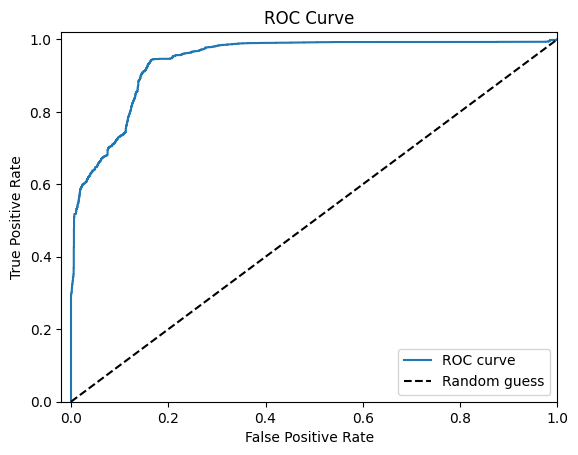

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = nb_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=200)

In [ ]:
y_pred = lr_classifier.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9615384615384616
Recall: 0.9852216748768473
F1-score: 0.9732360097323601


Decision tree classifier model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
y_pred_dt=dt_classifier.predict(x_test)
dt_accuracy=accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.9949722148716592

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[3484,   14],
       [  24, 4036]])

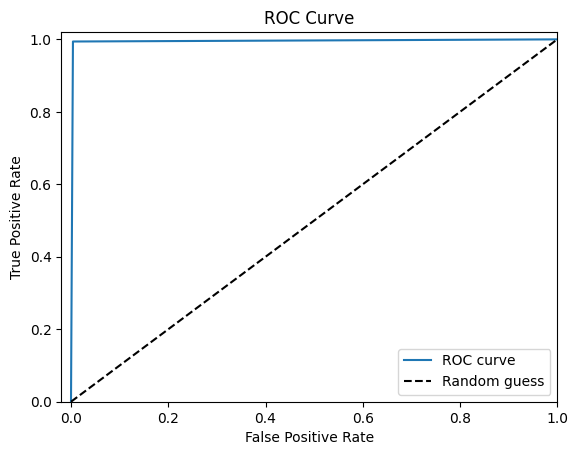

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = dt_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=200)

K Neighbours Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn_classifier.predict(x_test)
knn_accuracy=accuracy_score(y_test, y_pred_knn)
knn_accuracy

0.9830643027255888

In [ ]:
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[3435,   63],
       [  65, 3995]])

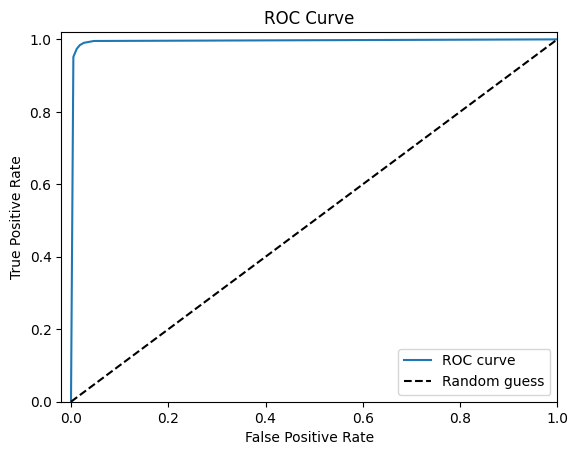

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = knn_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=200)

In [ ]:
y_pred = lr_classifier.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9615384615384616
Recall: 0.9852216748768473
F1-score: 0.9732360097323601


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
lr_classifier=LogisticRegression()
lr_classifier.fit(x_train, y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
y_pred_lr=lr_classifier.predict(x_test)
lr_accuracy=accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.9231278115903678

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[3127,  371],
       [ 210, 3850]])

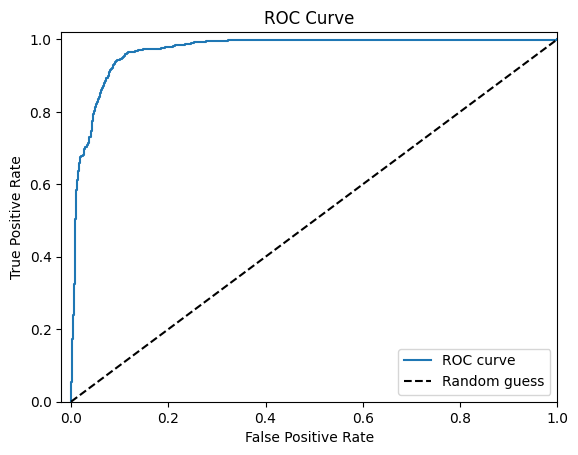

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = lr_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [ ]:
# In cell ipython-input-58-bb945a296f03

# Copy the following line from cell ipython-input-45-bb945a296f03
y_pred = lr_classifier.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.912106135986733
Recall: 0.9482758620689655
F1-score: 0.929839391377853


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
lr_classifier=SVC()
lr_classifier.fit(x_train, y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
y_pred_lr=lr_classifier.predict(x_test)
lr_accuracy=accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.9708917703096057

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[3338,  160],
       [  60, 4000]])

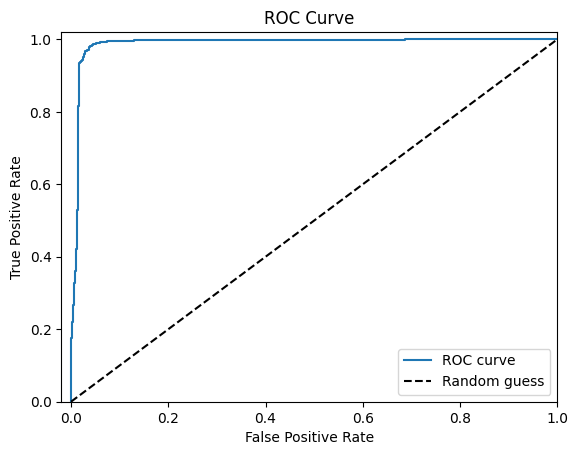

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
lr_classifier = SVC(probability=True)
lr_classifier.fit(x_train, y_train)
y_pred_prob = lr_classifier.decision_function(x_test)

y_pred_prob = lr_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [ ]:
y_pred = lr_classifier.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9615384615384616
Recall: 0.9852216748768473
F1-score: 0.9732360097323601
